# Pandas DataFrames

Pandas is one of the most widely used libraries in Python for data manipulation and analysis. 
It provides the `DataFrame` structure, which is a powerful tool for handling and analyzing structured data.


### What is a Pandas DataFrame?
A DataFrame is a table-like structure with rows and columns.
Each column can have a different data type (e.g., integer, float, string).
DataFrames have labeled axes:
Row labels (index)
Column labels (column names)
They are built on top of NumPy and offer features like:
Missing data handling.
Easy row/column selection and filtering.
Integration with various data sources (CSV, Excel, SQL, etc.).

### **Comparison: Pandas DataFrame vs. NumPy 2D Array**

| Feature                   | Pandas DataFrame                      | NumPy 2D Array                  |
|---------------------------|----------------------------------------|----------------------------------|
| **Structure**             | Tabular (rows and columns)            | Matrix-like (rows and columns)  |
| **Data types**            | **Columns can have mixed types**          | Homogeneous (all elements must be the same type) |
| **Labels**                | **Index and column labels**               | No labels, only positional indexing |
| **Operations**            | Built-in methods for grouping, filtering, merging, and more | Limited to numerical operations |
| **Integration**           | Easily integrates with files, databases, etc. | Requires custom handling or conversion(*) |
| **Ease of use**           | Designed for heterogenous data manipulation | Suited for mathematical and array computations |

A column in a dataframe is a pandas **Series** object. Which is similar to numpy 1D array, but supports labeled indexing.

In [61]:
import pandas as pd

# Create a Pandas Series
s = pd.Series([10, 20, 30, 40], index=['a', 'b', 'c', 'd'])
ic(s)


ic| s: a    10
       b    20
       c    30
       d    40
       dtype: int64


a    10
b    20
c    30
d    40
dtype: int64

### DataFrame from a Dictionary

In [ ]:
import pandas as pd

# Example DataFrame
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'Diana'],
    'Age': [25, 30, 35, 40],
    'City': ['New York', 'Los Angeles', 'Chicago', 'Houston'],
    'Salary': [70000, 80000, 120000, 110000]
}
df = pd.DataFrame(data)

# Example from your online activity:
students = {'hours': [29, 9, 10, 38, 16, 26, 50, 10, 30, 33, 43, 2, 39, 15, 44, 29, 41, 15, 24, 50], 
            'test_results': [65, 7, 8, 76, 23, 56, 100, 3, 74, 48, 73, 0, 62, 37, 74, 40, 90, 42, 58, 100]}
student_data = pd.DataFrame(data=students)

print(student_data)


### DataFrame from a File and saving to a File

In [12]:
# Load from CSV
df = pd.read_csv('hours_scores.csv')
print(df.head(5))
# Save to CSV
df.to_csv('hours_scores_no_indices.csv', index=False)
df.to_csv('hours_scores_with_indices.csv')
df = pd.read_excel('hours_scores.xlsx')
df.to_excel('hours_scores_with_indices.xlsx')
df.to_excel('hours_scores_no_indices.xlsx', index=False)

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30


#### Notes
- `index=False`: Prevents the row index from being written to the file. 
    - By default, the row index of the DataFrame is included as a column in the output CSV file. 
    - Setting `index=False` excludes it, ensuring the CSV contains only the data columns.

###  Viewing Data

In [ ]:
# Getting information about the dataframe: 
# Atributes
ic(df.size)
ic(df.shape)
ic(df.index)
ic(df.values)
ic(df.ndim)

# Methods:
ic(df.describe())

# Display the first 5 rows
ic(df.head(5))

# Display the last 5 rows
ic(df.tail(5))

ic(df.info())


### Notes

- `head(n)` displays the first `n` rows of the DataFrame (default is 5).
- `tail(n)` displays the last `n` rows of the DataFrame (default is 5).
- `describe()` provides summary statistics for numeric columns.


### Selecting Columns

In [ ]:
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'Diana'],
    'Age': [25, 30, 35, 40],
    'City': ['New York', 'Los Angeles', 'Chicago', 'Houston'],
    'Salary': [70000, 80000, 120000, 110000]
}
df = pd.DataFrame(data)
# Select a single column
ic(df['Name'])
s = df["Name"]
ic(type(s))

# Select multiple columns
icprint(df[['Name', 'Salary']])
# df.plot() # see below for a more menaingful plot

### Selecting Rows with `loc` vs `iloc`

In [ ]:
from icecream import ic
# Select rows using loc (label-based)
ic(type(df.loc[0]))
ic(df.loc[0])  # First row
ic(df.loc[0, 'City']) # City values in first row
ic(df.loc[0, ['Name','City']]) # Name and City values in first row
ic(df.loc[0:2])  # Rows with labels 0 to 2 (inclusive)
# Select specific rows and columns using loc
ic(df.loc[0:2, ['Name', 'Salary']])  # Rows 0 to 2 and specific columns

# The index values for df are row numbers. Let's make "Name" the index in a copy of df:
df2 = df.copy()
df2 = df2.set_index("Name")
# Select the row for 'Alice'
ic(df2.loc["Alice"])
# Select rows for 'Bob' and 'Diana'
print(df2.loc[['Bob', 'Diana']])
# Select the Salary of 'Charlie'
print(df2.loc['Charlie', 'Salary'])
# Select Age and Salary for 'Alice' and 'Charlie'
print(df2.loc[['Alice', 'Charlie'], ['Age', 'Salary']])


# Select rows using iloc (position-based)
ic(df.iloc[0])  # First row
ic(df.iloc[0:2])  # Rows at positions 0 to 2 (exclusive)
# Select specific rows and columns using iloc
ic(df.iloc[0:2, 1:3])  # Rows 0 to 2, columns 1 to 3 (exclusive)


#### Notes
- `loc` is label-based indexing: it selects rows and columns by their labels (names).
- `iloc` is position-based indexing: it selects rows and columns by their integer positions.


### Filtering Data

In [ ]:
# Filter rows where Age > 30
ic(df[df["Age"] > 30])
ic(df.loc[df["Age"] > 30])

# Filter rows where City is not 'New York'
ic(df[df["City"] != 'New York'])


#### Notes

- Use boolean indexing to filter rows based on conditions.
- Combine conditions using `&` (and), `|` (or), and `~` (not) operators.


### Modifying Data

In [ ]:
# Add a new column
df['Bonus'] = df['Salary'] * 0.1
print(df)

# Update a column
df['Age'] = df['Age'] + 1
print(df)

# Drop a column
df = df.drop('Bonus', axis=1)  # axis=1 means frop a column vs. a row
print(df)


#### Notes

- Adding a new column: Assign values to a new column name.
- Updating a column: Perform operations directly on an existing column.
- Dropping a column: Use `drop` with `axis=1`.


### Aggregate Functions and Grouping

In [ ]:
# Calculate the average salary
ic(df['Salary'].mean())

# Group by 'City' and calculate the average salary
ic(df.groupby('City')['Salary'].mean())


#### Notes

- Aggregation functions like `mean()`, `sum()`, `max()`, etc., can be applied to columns.
- Use `groupby` to group data by one or more columns and perform aggregations.


### Plotting Dataframes (Not in Quiz 4)

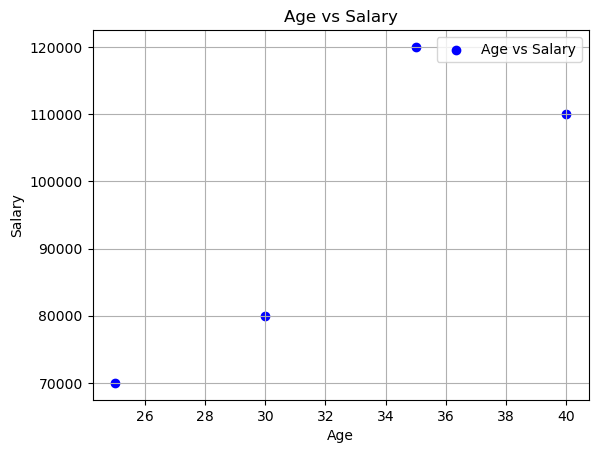

In [62]:
import matplotlib.pyplot as plt

data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'Diana'],
    'Age': [25, 30, 35, 40],
    'City': ['New York', 'Los Angeles', 'Chicago', 'Houston'],
    'Salary': [70000, 80000, 120000, 110000]
}
df = pd.DataFrame(data)

# Scatter plot of Age vs Salary
plt.scatter(df['Age'], df['Salary'], color='blue', label='Age vs Salary')

# Adding titles and labels
plt.title('Age vs Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()
plt.grid(True)
plt.show()
